# WeatherPy
----

#### Observations and Insights
* Scatter plot of Latitude Vs Temperature shows that as you move away from equator in either direction the Max Temperature of the palce decresaes
* Humidity tends to be higher as we move away from Equator
* There is a positive correlation between Cloudiness and Latitude
* There is negligible correlation between Windspeed and Latitude

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Ouput Directory for chart images
output_dir = "../output_data/"

# Output File for weather data (CSV)
output_data_file = "../output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Getting date when this notebook was executed
today_date = datetime.today().strftime('%m/%d/%Y')

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Creatint a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

# Creating subset of cities in count of 50
n = 50
def divide_cities(cities, n):
    for i in range(0, len(cities), n):
        yield cities[i:i + n]
cities = list(divide_cities(cities, n))

609


### Openweathermap API Calls

In [5]:
# Configuring gmaps information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Building partial query URL to be used for data pull request
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# creating list for response results to be stored
citynames = []
lat = []
lon = []
temp_max = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

print("Begining Data Retrieval")
print("------------------------------")
    
# looping through cities, making API request and append desired results into respective list
for idx1, city_list in enumerate(cities, start = 1):
    for idx2, city in enumerate(city_list):
        try:
            response = requests.get(query_url + city).json()
            print(f"Processing Record {idx2} of set {idx1} | {city}")
            citynames.append(response['name'])
            lat.append(response['coord']['lat'])
            lon.append(response['coord']['lon'])
            temp_max.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            windspeed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
        except KeyError:
            print("City not found. Skipping...")
    
    
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Begining Data Retrieval
------------------------------
Processing Record 0 of set 1 | nikolskoye
Processing Record 1 of set 1 | waipawa
Processing Record 2 of set 1 | east london
Processing Record 3 of set 1 | kuching
Processing Record 4 of set 1 | rikitea
Processing Record 5 of set 1 | maykain
City not found. Skipping...
Processing Record 6 of set 1 | mataura
Processing Record 7 of set 1 | vaini
Processing Record 8 of set 1 | ushuaia
Processing Record 9 of set 1 | lagoa
Processing Record 10 of set 1 | hami
Processing Record 11 of set 1 | gumushane
City not found. Skipping...
Processing Record 12 of set 1 | bluff
Processing Record 13 of set 1 | punta arenas
Processing Record 14 of set 1 | severo-kurilsk
Processing Record 15 of set 1 | qaanaaq
Processing Record 16 of set 1 | cidreira
Processing Record 17 of set 1 | rio gallegos
Processing Record 18 of set 1 | solnechnyy
Processing Record 19 of set 1 | scottsburgh
City not found. Skipping...
Processing Record 20 of set 1 | aksu
Processin

Processing Record 37 of set 4 | sola
Processing Record 38 of set 4 | amderma
City not found. Skipping...
Processing Record 39 of set 4 | roald
Processing Record 40 of set 4 | igbo ora
Processing Record 41 of set 4 | chuy
Processing Record 42 of set 4 | patea
Processing Record 43 of set 4 | rocha
Processing Record 44 of set 4 | qena
Processing Record 45 of set 4 | vaitupu
City not found. Skipping...
Processing Record 46 of set 4 | tias
Processing Record 47 of set 4 | san juan bautista
Processing Record 48 of set 4 | ozernovskiy
Processing Record 49 of set 4 | kahului
Processing Record 0 of set 5 | cadillac
Processing Record 1 of set 5 | samusu
City not found. Skipping...
Processing Record 2 of set 5 | charlestown
Processing Record 3 of set 5 | luang prabang
Processing Record 4 of set 5 | warri
Processing Record 5 of set 5 | aksarka
Processing Record 6 of set 5 | tuktoyaktuk
Processing Record 7 of set 5 | gurskoye
City not found. Skipping...
Processing Record 8 of set 5 | chicama
Process

Processing Record 26 of set 8 | saint george
Processing Record 27 of set 8 | margate
Processing Record 28 of set 8 | pardina
Processing Record 29 of set 8 | ayabe
Processing Record 30 of set 8 | yulara
Processing Record 31 of set 8 | ibaiti
Processing Record 32 of set 8 | katsuura
Processing Record 33 of set 8 | kulhudhuffushi
Processing Record 34 of set 8 | giehun
Processing Record 35 of set 8 | urubicha
Processing Record 36 of set 8 | ous
Processing Record 37 of set 8 | arlit
Processing Record 38 of set 8 | chupa
Processing Record 39 of set 8 | mareeba
Processing Record 40 of set 8 | belaya gora
Processing Record 41 of set 8 | kvitok
Processing Record 42 of set 8 | paradise valley
Processing Record 43 of set 8 | cherskiy
Processing Record 44 of set 8 | tabory
Processing Record 45 of set 8 | weiser
Processing Record 46 of set 8 | constitucion
Processing Record 47 of set 8 | ajdabiya
Processing Record 48 of set 8 | eidfjord
Processing Record 49 of set 8 | pimentel
Processing Record 0 o

Processing Record 12 of set 12 | umm durman
City not found. Skipping...
Processing Record 13 of set 12 | adrar
Processing Record 14 of set 12 | sibolga
Processing Record 15 of set 12 | dombarovskiy
Processing Record 16 of set 12 | karkaralinsk
City not found. Skipping...
Processing Record 17 of set 12 | havre-saint-pierre
Processing Record 18 of set 12 | grajau
Processing Record 19 of set 12 | paoua
Processing Record 20 of set 12 | guerrero negro
Processing Record 21 of set 12 | najran
Processing Record 22 of set 12 | along
Processing Record 23 of set 12 | agva
City not found. Skipping...
Processing Record 24 of set 12 | svetlogorsk
Processing Record 25 of set 12 | broken hill
Processing Record 26 of set 12 | floro
Processing Record 27 of set 12 | ulagan
Processing Record 28 of set 12 | tumannyy
City not found. Skipping...
Processing Record 29 of set 12 | rio grande
Processing Record 30 of set 12 | biltine
Processing Record 31 of set 12 | mujiayingzi
Processing Record 32 of set 12 | ta

### Convert Raw Data to DataFrame

In [6]:
# Building a dataset from the response data saved in data lists.

weather_data = {"City": citynames
                ,"Lat": lat
                ,"Lon": lon
                ,"Max Temp": temp_max
                ,"Humidity": humidity
                ,"Cloudiness": cloudiness
                ,"Windspeed": windspeed
                ,"Country": country
                ,"Date": date
               }

# Converting the dataset into a Pandas Dataframe
weather_data = pd.DataFrame(weather_data)

# Previewing the Dataframe
weather_data.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,Nikolskoye,59.70,30.79,37.40,93,90,8.95,RU,1603308261
1,Waipawa,-41.41,175.52,57.00,76,8,11.41,NZ,1603308530
2,East London,-33.02,27.91,66.20,77,2,11.41,ZA,1603308530
3,Kuching,1.55,110.33,75.20,94,40,2.24,MY,1603308531
4,Rikitea,-23.12,-134.97,73.87,66,5,8.52,PF,1603308531


In [7]:
# Describing the dataframe to understand limits in the data
weather_data.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Windspeed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,19.949638,20.928752,60.378571,72.817360,53.312839,7.661718,1.603309e+09
std,33.839074,91.928323,21.356516,21.019511,40.050486,5.190905,9.250280e+01
min,-54.800000,-179.170000,3.200000,10.000000,0.000000,0.470000,1.603308e+09
25%,-8.160000,-59.520000,44.190000,63.000000,7.000000,3.620000,1.603309e+09
50%,24.470000,27.410000,65.190000,78.000000,63.000000,6.330000,1.603309e+09
75%,48.460000,102.500000,78.080000,88.000000,94.000000,10.290000,1.603309e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,29.530000,1.603309e+09


## Inspecting the data and removing the cities where the humidity > 100%.

In [8]:
# Cleaning Weather data from dataframe, where humidity % is greater than 100
clean_weather_data = weather_data[weather_data["Humidity"]<=100.00]

# Describing the dataframe again to check the data limits
clean_weather_data.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Windspeed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,19.949638,20.928752,60.378571,72.817360,53.312839,7.661718,1.603309e+09
std,33.839074,91.928323,21.356516,21.019511,40.050486,5.190905,9.250280e+01
min,-54.800000,-179.170000,3.200000,10.000000,0.000000,0.470000,1.603308e+09
25%,-8.160000,-59.520000,44.190000,63.000000,7.000000,3.620000,1.603309e+09
50%,24.470000,27.410000,65.190000,78.000000,63.000000,6.330000,1.603309e+09
75%,48.460000,102.500000,78.080000,88.000000,94.000000,10.290000,1.603309e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,29.530000,1.603309e+09


In [9]:
# Previewing the Clean data
clean_weather_data.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,Nikolskoye,59.70,30.79,37.40,93,90,8.95,RU,1603308261
1,Waipawa,-41.41,175.52,57.00,76,8,11.41,NZ,1603308530
2,East London,-33.02,27.91,66.20,77,2,11.41,ZA,1603308530
3,Kuching,1.55,110.33,75.20,94,40,2.24,MY,1603308531
4,Rikitea,-23.12,-134.97,73.87,66,5,8.52,PF,1603308531


In [10]:
# Naming the index of the dataframe for export to csv
clean_weather_data.index.names = ["City_ID"]

# Exporting the data to CSV file
clean_weather_data.to_csv(output_data_file)

## Plotting the Data

## Latitude vs. Temperature Plot

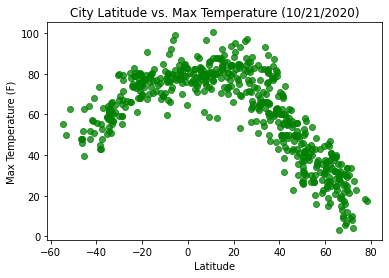

In [11]:
# Plotting scatter plot for Latitude Vs Temperature from Cleaned Data
plot_chart = plt.scatter(lat, temp_max, marker="o", facecolors="green", alpha=0.75)

# Setting up chart display parameters
plt.title(f"City Latitude vs. Max Temperature ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

# Exporting chart to output folder in png format
export_chart = plot_chart.get_figure()
file_name = "Lat Vs Temp Plot.png"
export_chart.savefig(output_dir + file_name)


#### Observations
* Above scatter plot of Latitude Vs Temperature shows that as you move away from equator in either direction the Max Temperature of the palce decresaes
* Min Temperature in Southern Hemisphere seems to higher than that is in Norther Hemisphere

## Latitude vs. Humidity Plot

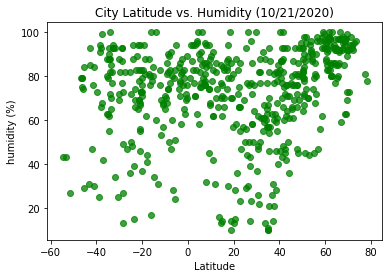

In [12]:
# Plotting scatter plot for Latitude Vs Humidity from Cleaned Data
plot_chart = plt.scatter(lat, humidity, marker="o", facecolors="green"
            , alpha=0.75)

# Setting up chart display parameters
plt.title(f"City Latitude vs. Humidity ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("humidity (%)")
plt.show()

# Exporting chart to output folder in png format
export_chart = plot_chart.get_figure()
file_name = "Lat Vs Humidity Plot.png"
export_chart.savefig(output_dir + file_name)

#### Observations
* Above scatter plot of Latitude Vs Humidity shows that Humidity tends to be higher as we move away from Equator towards Northern Hemisphere

## Latitude vs. Cloudiness Plot

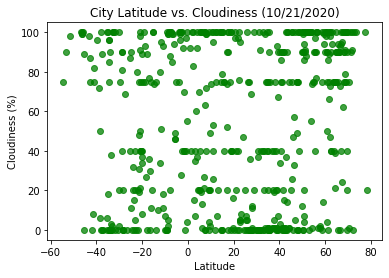

In [13]:
# Plotting scatter plot for Latitude Vs Cloudiness from Cleaned Data
plot_chart = plt.scatter(lat, cloudiness , marker="o", facecolors="green"
            , alpha=0.75)

# Setting up chart display parameters
plt.title(f"City Latitude vs. Cloudiness ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

# Exporting chart to output folder in png format
export_chart = plot_chart.get_figure()
file_name = "Lat Vs Cloudiness(%) Plot.png"
export_chart.savefig(output_dir + file_name)


#### Observations
* It is difficult to interprete any relationship between Latitude and cloudiness.

## Latitude vs. Wind Speed Plot

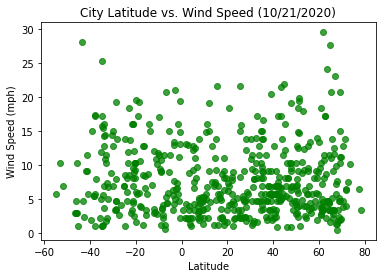

In [14]:
# Plotting scatter plot for Latitude Vs Windspeed from Cleaned Data
plot_chart = plt.scatter(lat, windspeed, marker="o", facecolors="green"
            , alpha=0.75)

# Setting up chart display parameters
plt.title(f"City Latitude vs. Wind Speed ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

# Exporting chart to output folder in png format
export_chart = plot_chart.get_figure()
file_name = "Lat Vs Wind Speed Plot.png"
export_chart.savefig(output_dir + file_name)


#### Observations
* There are very few cities with windspeed > 25 mph and those are in Northern Hemisphere

## Linear Regression

In [32]:
# Creating 2 dataframes for Northern and Southern Hemisphere
weather_data_n = clean_weather_data[clean_weather_data["Lat"]>=0.00]
weather_data_s = clean_weather_data[clean_weather_data["Lat"]<0.00]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

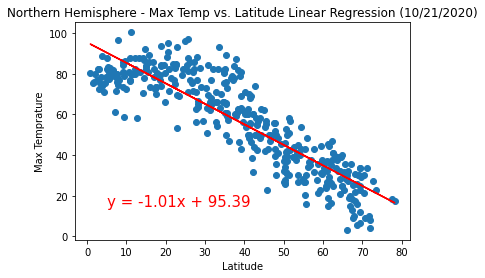

In [33]:
# Setting parameters for Linear Regression
x_axis = weather_data_n["Lat"]
y_axis = weather_data_n["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Calculating and storing predicted values from regression equation
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot_chart = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,15),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temprature")
plt.show()

# Exporting chart to output folder in png format
export_chart = plot_chart.get_figure()
file_name = "NH - Lat Vs Temp Plot.png"
export_chart.savefig(output_dir + file_name, bbox_inches='tight')

#### Observations
* In Northerhemisphere, as we are moving away from equator, temperature is decreasing. This is supported by the regression equation which shows near 1 slope value.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

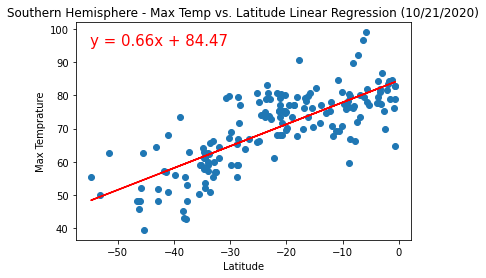

In [34]:
# Setting parameters for Linear Regression
x_axis = weather_data_s["Lat"]
y_axis = weather_data_s["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Calculating and storing predicted values from regression equation
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot_chart = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temprature")
plt.show()

# Exporting chart to output folder in png format
export_chart = plot_chart.get_figure()
file_name = "SH - Lat Vs Temp Plot.png"
export_chart.savefig(output_dir + file_name, bbox_inches='tight')

#### Observations
* In Southern Hemisphere, as we are moving towards Equator, Temp is increasing. It is mirror of the plot for Northern Hemisphere, due to x axis values. The relationship is strong, but not as strong as for Northern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

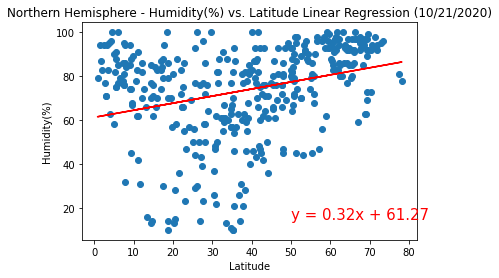

In [35]:
# Setting parameters for Linear Regression
x_axis = weather_data_n["Lat"]
y_axis = weather_data_n["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Calculating and storing predicted values from regression equation
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot_chart = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,15),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.show()

# Exporting chart to output folder in png format
export_chart = plot_chart.get_figure()
file_name = "NH - Lat Vs Humidity(%) Plot.png"
export_chart.savefig(output_dir + file_name, bbox_inches='tight')

#### Observations
* There is a slightly positive relationship between Humidity and Latitude. Lower Humidity levels almost disappear at higher latitude values.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

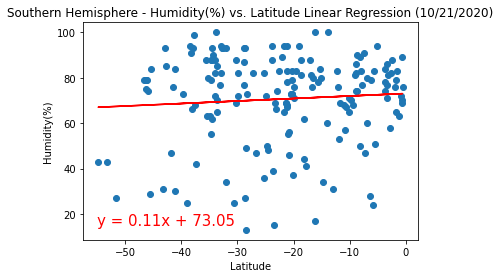

In [36]:
# Setting parameters for Linear Regression
x_axis = weather_data_s["Lat"]
y_axis = weather_data_s["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Calculating and storing predicted values from regression equation
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot_chart = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")

# Setting Chart Display Parameters
plt.title(f"Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.show()

# Exporting chart to output folder in png format
export_chart = plot_chart.get_figure()
file_name = "SH - Lat Vs Humidity(%) Plot.png"
export_chart.savefig(output_dir + file_name, bbox_inches='tight')

#### Observations
* This tren is similar to Northern Hemisphere, however the regressin is almost flat, which suggests there is very low probability of prediction of Humidity based on Latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

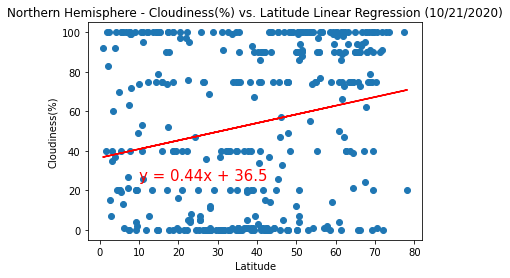

In [37]:
# Setting parameters for Linear Regression
x_axis = weather_data_n["Lat"]
y_axis = weather_data_n["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Calculating and storing predicted values from regression equation
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot_chart = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="red")

# Setting Chart Display Parameters
plt.title(f"Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.show()

# Exporting chart to output folder in png format
export_chart = plot_chart.get_figure()
file_name = "NH - Lat Vs Cloudiness(%) Plot.png"
export_chart.savefig(output_dir + file_name, bbox_inches='tight')

#### Observations
* This shows a positive relationship between Latitude and Cloudiness in Northern Hemisphere, that is as we move away from equator, Cloudiness increases.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

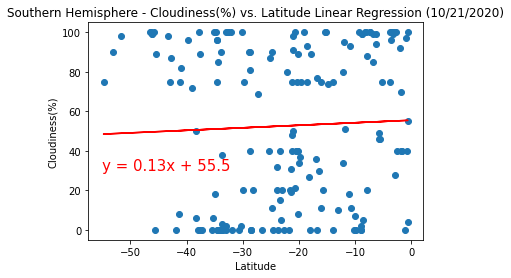

In [38]:
# Setting parameters for Linear Regression
x_axis = weather_data_s["Lat"]
y_axis = weather_data_s["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Calculating and storing predicted values from regression equation
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot_chart = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")

# Setting Chart Display Parameters
plt.title(f"Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.show()

# Exporting chart to output folder in png format
export_chart = plot_chart.get_figure()
file_name = "SH - Lat Vs Cloudiness(%) Plot.png"
export_chart.savefig(output_dir + file_name, bbox_inches='tight')

#### Observations
* Southern Hemisphere following the same trend as Northern Hemisphere, which is with increase in Latitude, there is an increase in Cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

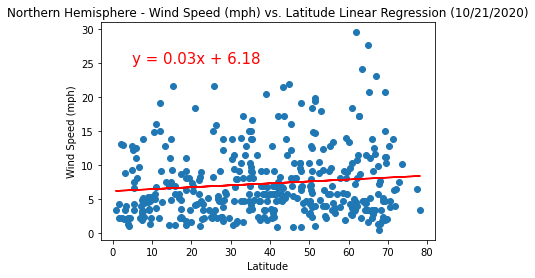

In [39]:
# Setting parameters for Linear Regression
x_axis = weather_data_n["Lat"]
y_axis = weather_data_n["Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Calculating and storing predicted values from regression equation
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot_chart = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,25),fontsize=15,color="red")

# Setting Chart Display Parameters
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

# Exporting chart to output folder in png format
export_chart = plot_chart.get_figure()
file_name = "NH - Lat Vs Wind Speed (mph) Plot.png"
export_chart.savefig(output_dir + file_name, bbox_inches='tight')

#### Observations
* There is no correlation between Windspeed and Latitude. Slope of line is near 0.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

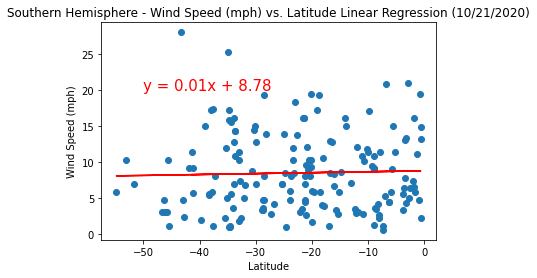

In [40]:
# Setting parameters for Linear Regression
x_axis = weather_data_s["Lat"]
y_axis = weather_data_s["Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Calculating and storing predicted values from regression equation
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot_chart = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Setting Chart Display Parameters
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

# Exporting chart to output folder in png format
export_chart = plot_chart.get_figure()
file_name = "SH - Lat Vs Wind Speed (mph) Plot.png"
export_chart.savefig(output_dir + file_name, bbox_inches='tight')

#### Observations
* Resutls are similar to Norther Hemisphere. There is no correlation between Windspeed and Latitude.